In [1]:
import pandas as pd
import numpy as np
import re
from random import random
import emoji
from tqdm import notebook
def tqdm(x, **kargs):
    return notebook.tqdm(x, leave=False, **kargs)
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

In [2]:
from transformers import RobertaTokenizer, RobertaModel

I0616 03:58:02.806304 139764150024000 file_utils.py:39] PyTorch version 1.5.0 available.
/home/ino/anaconda3/envs/TrackNet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ino/anaconda3/envs/TrackNet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ino/anaconda3/envs/TrackNet/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint1

## Loading data

In [4]:
df_train = pd.read_json('./source/train_gold.json', lines=True)
categories_type = pd.read_json('./source/categories.json', lines=True)
df_dev = pd.read_json('./source/dev_unlabeled.json', lines=True)
df_test = pd.read_json('./source/test_unlabeled.json', lines=True)
print("Number of text in training data: {}".format(df_train.shape[0]))
print("Number of text in categories: {}".format(categories_type.shape[1]))
print("Number of text in developing data: {}".format(df_dev.shape[0]))
print("Number of text in testing data: {}".format(df_test.shape[0]))

Number of text in training data: 32000
Number of text in categories: 43
Number of text in developing data: 4000
Number of text in testing data: 4000


In [3]:
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
model = RobertaModel.from_pretrained("roberta-base")

I0616 03:58:11.422604 139764150024000 tokenization_utils.py:1015] loading file https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-vocab.json from cache at /home/ino/.cache/torch/transformers/d0c5776499adc1ded22493fae699da0971c1ee4c2587111707a4d177d20257a2.ef00af9e673c7160b4d41cfda1f48c5f4cba57d5142754525572a846a1ab1b9b
I0616 03:58:11.424482 139764150024000 tokenization_utils.py:1015] loading file https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-merges.txt from cache at /home/ino/.cache/torch/transformers/b35e7cd126cd4229a746b5d5c29a749e8e84438b14bcdb575950584fe33207e8.70bec105b4158ed9a1747fea67a43f5dee97855c64d62b6ec3742f4cfdb5feda
I0616 03:58:12.842436 139764150024000 configuration_utils.py:285] loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/roberta-base-config.json from cache at /home/ino/.cache/torch/transformers/e1a2a406b5a05063c31f4dfdee7608986ba7c6393f7f79db5e69dcd197208534.117c81977c5979de8c088352e74ec6e70f5c66096c28b

In [6]:
roberta_vocab = pd.read_json('roberta_vocab/vocab.json', typ='series')

In [7]:
list(roberta_vocab.keys())

['<s>',
 '<pad>',
 '</s>',
 '<unk>',
 '.',
 'Ġthe',
 ',',
 'Ġto',
 'Ġand',
 'Ġof',
 'Ġa',
 'Ġin',
 '-',
 'Ġfor',
 'Ġthat',
 'Ġon',
 'Ġis',
 'âĢ',
 "'s",
 'Ġwith',
 'ĠThe',
 'Ġwas',
 'Ġ"',
 'Ġat',
 'Ġit',
 'Ġas',
 'Ġsaid',
 'Ļ',
 'Ġbe',
 's',
 'Ġby',
 'Ġfrom',
 'Ġare',
 'Ġhave',
 'Ġhas',
 ':',
 'Ġ(',
 'Ġhe',
 'ĠI',
 'Ġhis',
 'Ġwill',
 'Ġan',
 'Ġthis',
 ')',
 'ĠâĢ',
 'Ġnot',
 'Ŀ',
 'Ġyou',
 'ľ',
 'Ġtheir',
 'Ġor',
 'Ġthey',
 'Ġwe',
 'Ġbut',
 'Ġwho',
 'Ġmore',
 'Ġhad',
 'Ġbeen',
 'Ġwere',
 'Ġabout',
 ',"',
 'Ġwhich',
 'Ġup',
 'Ġits',
 'Ġcan',
 'Ġone',
 'Ġout',
 'Ġalso',
 'Ġ$',
 'Ġher',
 'Ġall',
 'Ġafter',
 '."',
 '/',
 'Ġwould',
 "'t",
 'Ġyear',
 'Ġwhen',
 'Ġfirst',
 'Ġshe',
 'Ġtwo',
 'Ġover',
 'Ġpeople',
 'ĠA',
 'Ġour',
 'ĠIt',
 'Ġtime',
 'Ġthan',
 'Ġinto',
 'Ġthere',
 't',
 'ĠHe',
 'Ġnew',
 'ĠâĢĶ',
 'Ġlast',
 'Ġjust',
 'ĠIn',
 'Ġother',
 'Ġso',
 'Ġwhat',
 'I',
 'Ġlike',
 'a',
 'Ġsome',
 'S',
 'Ã«',
 'Ġthem',
 'Ġyears',
 "'",
 'Ġdo',
 'Ġyour',
 'Ġ-',
 'Ġ1',
 '"',
 'Ġif',
 'Ġcould',
 '?',

## Start analyze

In [8]:
def get_vocab(corpus):
    vocabulary = Counter()
    for sentance in corpus:
        for word in sentance.split():
            vocabulary.update([word])
    return vocabulary

In [9]:
def check_coverage(vocabs, roberta_vocab):
    known_words = {}
    unknown_words = {}
    known_count = 0
    unknown_count = 0
    for word in tqdm(vocabs.keys(), desc='Checking: '):
        if word in list(roberta_vocab.keys()):
            known_words[word] = roberta_vocab[word]
            known_count += vocabs[word]
        elif 'Ġ' + word in list(roberta_vocab.keys()):
            # If we have deep look in roberta tokenizer, many words combine with 'Ġ' since roberta is byte pair encoding
            known_words[word] = roberta_vocab['Ġ' + word]
            known_count += vocabs[word]            
        else:
            unknown_words[word] = vocabs[word]
            unknown_count += vocabs[word]
    print("Found embeddings for {:.3%} ({} / {}) of vocab".format(len(known_words) / len(vocabs), len(known_words), len(vocabs)))
    print("Found embeddings for {:.3%} ({} / {}) of all text".format(known_count / (known_count + unknown_count), known_count, (known_count + unknown_count)))
    return unknown_words

In [10]:
train_text_vocab = get_vocab(df_train['text'].values)
train_reply_vocab = get_vocab(df_train['reply'].values)
print("train text unique vocab count is: {}".format(len(train_text_vocab)))
print("train reply unique vocab count is: {}".format(len(train_reply_vocab)))
unknown_text = check_coverage(train_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(train_reply_vocab, roberta_vocab)

train text unique vocab count is: 68961
train reply unique vocab count is: 25542


Found embeddings for 22.820% (15737 / 68961) of vocab
Found embeddings for 77.681% (508783 / 654963) of all text



Found embeddings for 30.307% (7741 / 25542) of vocab
Found embeddings for 73.164% (79306 / 108395) of all text


In [11]:
dev_text_vocab = get_vocab(df_dev['text'].values)
dev_reply_vocab = get_vocab(df_dev['reply'].values)
print("dev text unique vocab count is: {}".format(len(dev_text_vocab)))
print("dev reply unique vocab count is: {}".format(len(dev_reply_vocab)))
unknown_text = check_coverage(dev_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(dev_reply_vocab, roberta_vocab)

dev text unique vocab count is: 17684
dev reply unique vocab count is: 5360


Found embeddings for 39.064% (6908 / 17684) of vocab
Found embeddings for 77.472% (64280 / 82972) of all text



Found embeddings for 45.243% (2425 / 5360) of vocab
Found embeddings for 72.608% (10046 / 13836) of all text


In [12]:
test_text_vocab = get_vocab(df_test['text'].values)
test_reply_vocab = get_vocab(df_test['reply'].values)
print("test text unique vocab count is: {}".format(len(test_text_vocab)))
print("test reply unique vocab count is: {}".format(len(test_reply_vocab)))
unknown_text = check_coverage(test_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(test_reply_vocab, roberta_vocab)

test text unique vocab count is: 17338
test reply unique vocab count is: 5187


Found embeddings for 39.826% (6905 / 17338) of vocab
Found embeddings for 78.101% (63967 / 81903) of all text



Found embeddings for 45.171% (2343 / 5187) of vocab
Found embeddings for 72.828% (9641 / 13238) of all text


### Try to convert to lower case

In [13]:
def get_vocab_lower(corpus):
    vocabulary = Counter()
    for sentance in corpus:
        for word in sentance.lower().split():
            vocabulary.update([word])
    return vocabulary

In [14]:
train_text_vocab = get_vocab_lower(df_train['text'].values)
train_reply_vocab = get_vocab_lower(df_train['reply'].values)
print("train text unique vocab count is: {}".format(len(train_text_vocab)))
print("train reply unique vocab count is: {}".format(len(train_reply_vocab)))
unknown_text_lower = check_coverage(train_text_vocab, roberta_vocab)
print()
unknown_reply_lower = check_coverage(train_reply_vocab, roberta_vocab)

train text unique vocab count is: 60613
train reply unique vocab count is: 22586


Found embeddings for 19.479% (11807 / 60613) of vocab
Found embeddings for 77.394% (506905 / 654963) of all text



Found embeddings for 27.344% (6176 / 22586) of vocab
Found embeddings for 73.495% (79665 / 108395) of all text


In [15]:
dev_text_vocab = get_vocab_lower(df_dev['text'].values)
dev_reply_vocab = get_vocab_lower(df_dev['reply'].values)
print("dev text unique vocab count is: {}".format(len(dev_text_vocab)))
print("dev reply unique vocab count is: {}".format(len(dev_reply_vocab)))
unknown_text = check_coverage(dev_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(dev_reply_vocab, roberta_vocab)

dev text unique vocab count is: 15888
dev reply unique vocab count is: 4818


Found embeddings for 35.203% (5593 / 15888) of vocab
Found embeddings for 77.151% (64014 / 82972) of all text



Found embeddings for 42.777% (2061 / 4818) of vocab
Found embeddings for 73.143% (10120 / 13836) of all text


In [16]:
test_text_vocab = get_vocab_lower(df_test['text'].values)
test_reply_vocab = get_vocab_lower(df_test['reply'].values)
print("test text unique vocab count is: {}".format(len(test_text_vocab)))
print("test reply unique vocab count is: {}".format(len(test_reply_vocab)))
unknown_text = check_coverage(test_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(test_reply_vocab, roberta_vocab)

test text unique vocab count is: 15473
test reply unique vocab count is: 4674


Found embeddings for 36.418% (5635 / 15473) of vocab
Found embeddings for 77.830% (63745 / 81903) of all text



Found embeddings for 42.576% (1990 / 4674) of vocab
Found embeddings for 73.236% (9695 / 13238) of all text


### Show some unknown tokens!

In [17]:
unknown_text

{'@youngdeji_': 1,
 'uzi': 2,
 'carti': 4,
 'monday': 3,
 'woah': 1,
 'we’re': 27,
 'safety.': 1,
 'dababy': 4,
 'niggas': 10,
 'denny’s': 1,
 'indians': 3,
 'don’t': 126,
 'cricket.': 1,
 'would’ve': 3,
 'out.': 21,
 'zaira': 1,
 'wasim': 1,
 'hardwork': 1,
 'screen.': 1,
 'sick.': 4,
 '@madisonbeer': 1,
 'i’ve': 57,
 '“as': 2,
 'please”': 1,
 'wtf': 8,
 '@lupeloops': 1,
 '😓': 3,
 "haven't": 7,
 'ops,': 1,
 "ain't": 6,
 'disappointments....': 1,
 'work.': 6,
 'cried.': 1,
 'settings,': 1,
 'home,': 3,
 'it.': 94,
 'nightmare.': 3,
 'spamming': 4,
 'mad.': 4,
 'couldn’t': 10,
 'back.': 14,
 'replying': 5,
 '“who': 4,
 'are?!”': 3,
 'up.': 25,
 '😰': 4,
 'understands.': 1,
 'prophet.': 1,
 'doing?': 4,
 'i’m': 263,
 'overreacting,': 1,
 'obsessing,': 1,
 'worrying,': 1,
 'disassociating.': 1,
 'here!': 2,
 'covid-19': 34,
 'vaccine?': 11,
 'myrtle': 1,
 'am.': 3,
 'spiraling.': 1,
 'grudges.': 1,
 'so,': 7,
 'mind,': 2,
 "who's": 9,
 'me?': 11,
 'oldrich': 6,
 'people,': 13,
 'judgement,

## Clean weird punctuations

#### No significantly improve

In [18]:
def clean_weird(text):
    specials = ["’", "‘", "´", "`"]
    text = text.replace("’", "'")
    text = text.replace("‘", "'")
    text = text.replace("´", "'")
    text = text.replace("`", "'")
    return text

In [19]:
df_train['text'] = df_train.text.apply(clean_weird)
df_train['reply'] = df_train.reply.apply(clean_weird)

In [20]:
df_dev['text'] = df_dev.text.apply(clean_weird)
df_dev['reply'] = df_dev.reply.apply(clean_weird)

In [21]:
df_test['text'] = df_test.text.apply(clean_weird)
df_test['reply'] = df_test.reply.apply(clean_weird)

In [22]:
train_text_vocab = get_vocab(df_train['text'].values)
train_reply_vocab = get_vocab(df_train['reply'].values)
print("train text unique vocab count is: {}".format(len(train_text_vocab)))
print("train reply unique vocab count is: {}".format(len(train_reply_vocab)))
unknown_text = check_coverage(train_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(train_reply_vocab, roberta_vocab)

train text unique vocab count is: 68710
train reply unique vocab count is: 25436


Found embeddings for 22.908% (15740 / 68710) of vocab
Found embeddings for 77.684% (508799 / 654963) of all text



Found embeddings for 30.441% (7743 / 25436) of vocab
Found embeddings for 73.166% (79308 / 108395) of all text


In [23]:
dev_text_vocab = get_vocab(df_dev['text'].values)
dev_reply_vocab = get_vocab(df_dev['reply'].values)
print("dev text unique vocab count is: {}".format(len(dev_text_vocab)))
print("dev reply unique vocab count is: {}".format(len(dev_reply_vocab)))
unknown_text = check_coverage(dev_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(dev_reply_vocab, roberta_vocab)

dev text unique vocab count is: 17597
dev reply unique vocab count is: 5322


Found embeddings for 39.257% (6908 / 17597) of vocab
Found embeddings for 77.473% (64281 / 82972) of all text



Found embeddings for 45.584% (2426 / 5322) of vocab
Found embeddings for 72.615% (10047 / 13836) of all text


In [24]:
test_text_vocab = get_vocab(df_test['text'].values)
test_reply_vocab = get_vocab(df_test['reply'].values)
print("test text unique vocab count is: {}".format(len(test_text_vocab)))
print("test reply unique vocab count is: {}".format(len(test_reply_vocab)))
unknown_text = check_coverage(test_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(test_reply_vocab, roberta_vocab)

test text unique vocab count is: 17246
test reply unique vocab count is: 5152


Found embeddings for 40.044% (6906 / 17246) of vocab
Found embeddings for 78.102% (63968 / 81903) of all text



Found embeddings for 45.477% (2343 / 5152) of vocab
Found embeddings for 72.828% (9641 / 13238) of all text


## Transform apostrophes

In [25]:
apostrophes = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [26]:
def change_apostrophes(text):
    # Replace apostrophes to original term
    for key in apostrophes.keys():
        text = text.replace(key, apostrophes[key])
    return text

In [27]:
df_train['text'] = df_train.text.apply(change_apostrophes)
df_train['reply'] = df_train.reply.apply(change_apostrophes)

In [28]:
df_dev['text'] = df_dev.text.apply(change_apostrophes)
df_dev['reply'] = df_dev.reply.apply(change_apostrophes)

In [29]:
df_test['text'] = df_test.text.apply(change_apostrophes)
df_test['reply'] = df_test.reply.apply(change_apostrophes)

In [30]:
train_text_vocab = get_vocab(df_train['text'].values)
train_reply_vocab = get_vocab(df_train['reply'].values)
print("train text unique vocab count is: {}".format(len(train_text_vocab)))
print("train reply unique vocab count is: {}".format(len(train_reply_vocab)))
unknown_text = check_coverage(train_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(train_reply_vocab, roberta_vocab)

train text unique vocab count is: 68558
train reply unique vocab count is: 25352


Found embeddings for 22.959% (15740 / 68558) of vocab
Found embeddings for 80.319% (537529 / 669242) of all text



Found embeddings for 30.546% (7744 / 25352) of vocab
Found embeddings for 75.973% (84170 / 110789) of all text


In [31]:
dev_text_vocab = get_vocab(df_dev['text'].values)
dev_reply_vocab = get_vocab(df_dev['reply'].values)
print("dev text unique vocab count is: {}".format(len(dev_text_vocab)))
print("dev reply unique vocab count is: {}".format(len(dev_reply_vocab)))
unknown_text = check_coverage(dev_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(dev_reply_vocab, roberta_vocab)

dev text unique vocab count is: 17524
dev reply unique vocab count is: 5273


Found embeddings for 39.432% (6910 / 17524) of vocab
Found embeddings for 80.157% (67975 / 84802) of all text



Found embeddings for 46.008% (2426 / 5273) of vocab
Found embeddings for 75.556% (10692 / 14151) of all text


In [32]:
test_text_vocab = get_vocab(df_test['text'].values)
test_reply_vocab = get_vocab(df_test['reply'].values)
print("test text unique vocab count is: {}".format(len(test_text_vocab)))
print("test reply unique vocab count is: {}".format(len(test_reply_vocab)))
unknown_text = check_coverage(test_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(test_reply_vocab, roberta_vocab)

test text unique vocab count is: 17171
test reply unique vocab count is: 5108


Found embeddings for 40.225% (6907 / 17171) of vocab
Found embeddings for 80.592% (67376 / 83601) of all text



Found embeddings for 45.869% (2343 / 5108) of vocab
Found embeddings for 75.643% (10236 / 13532) of all text


In [33]:
unknown_text

{'@Youngdeji_': 1,
 'uzi': 2,
 'carti': 3,
 'woah': 1,
 'safety.': 1,
 'dababy': 3,
 'niggas': 6,
 "Denny's": 1,
 'cricket.': 1,
 'out.': 21,
 'Zaira': 1,
 'Wasim': 1,
 'hardwork': 1,
 'screen.': 1,
 'sick.': 4,
 '@madisonbeer': 1,
 '“as': 2,
 'please”': 1,
 'wtf': 5,
 '@LupeLoops': 1,
 '😓': 3,
 'ops,': 1,
 'disappointments....': 1,
 'work.': 6,
 'cried.': 1,
 'settings,': 1,
 'home,': 3,
 'it.': 93,
 'nightmare.': 3,
 'spamming': 4,
 'mad.': 4,
 'back.': 13,
 'replying': 5,
 '“Who': 3,
 'are?!”': 3,
 'PHYSICALLY': 3,
 'up.': 25,
 '😰': 4,
 'understands.': 1,
 'prophet.': 1,
 'Doing?': 1,
 'overreacting,': 1,
 'obsessing,': 1,
 'worrying,': 1,
 'disassociating.': 1,
 'here!': 2,
 'Covid-19': 15,
 'Vaccine?': 11,
 'myrtle': 1,
 'am.': 3,
 'spiraling.': 1,
 'STRATEGICALLY': 1,
 'DYNAMICALLY': 1,
 'grudges.': 1,
 'So,': 5,
 'mind,': 2,
 'me?': 9,
 'OldRich': 6,
 'people,': 12,
 'judgement,': 6,
 'kindness,': 8,
 'HUNGRY': 6,
 '(now': 6,
 '“teammates”)!': 6,
 'hyperventilate': 1,
 'bag.': 1

## Check punctuations that roberta unknown 

In [34]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
def unknown_punctuation(roberta_vocab):
    unknown = ''
    for char in punct:
        if char not in list(roberta_vocab.keys()):
            unknown += char
            unknown += ' '
    return unknown

In [35]:
print("Roberta unknown: ")
print(unknown_punctuation(roberta_vocab))

Roberta unknown: 
“ ” ’ ∞ θ α • − β ∅ π ‘ ₹ € ™ √ — – 


### Mapping unknown to known punctuations

In [36]:
def change_punc(text):
    punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }
    for p in punct_mapping:
        text = text.replace(p, punct_mapping[p])
    for p in punct:
        text = text.replace(p, ' {} '.format(p))
    return text

In [37]:
df_train['map_punc_text'] = df_train.text.apply(change_punc)
df_train['map_punc_reply'] = df_train.reply.apply(change_punc)

In [38]:
df_dev['map_punc_text'] = df_dev.text.apply(change_punc)
df_dev['map_punc_reply'] = df_dev.reply.apply(change_punc)

In [39]:
df_test['map_punc_text'] = df_test.text.apply(change_punc)
df_test['map_punc_reply'] = df_test.reply.apply(change_punc)

In [40]:
train_text_vocab = get_vocab(df_train['map_punc_text'].values)
train_reply_vocab = get_vocab(df_train['map_punc_reply'].values)
print("train text unique vocab count is: {}".format(len(train_text_vocab)))
print("train reply unique vocab count is: {}".format(len(train_reply_vocab)))
print()

unknown_text = check_coverage(train_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(train_reply_vocab, roberta_vocab)

train text unique vocab count is: 46129
train reply unique vocab count is: 18569



Found embeddings for 38.009% (17533 / 46129) of vocab
Found embeddings for 92.560% (743996 / 803801) of all text



Found embeddings for 47.709% (8859 / 18569) of vocab
Found embeddings for 89.777% (124148 / 138285) of all text


In [41]:
dev_text_vocab = get_vocab(df_dev['map_punc_text'].values)
dev_reply_vocab = get_vocab(df_dev['map_punc_reply'].values)
print("dev text unique vocab count is: {}".format(len(dev_text_vocab)))
print("dev reply unique vocab count is: {}".format(len(dev_reply_vocab)))
unknown_text = check_coverage(dev_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(dev_reply_vocab, roberta_vocab)

dev text unique vocab count is: 13357
dev reply unique vocab count is: 4473


Found embeddings for 59.886% (7999 / 13357) of vocab
Found embeddings for 92.546% (94356 / 101956) of all text



Found embeddings for 63.604% (2845 / 4473) of vocab
Found embeddings for 89.144% (15635 / 17539) of all text


In [42]:
test_text_vocab = get_vocab(df_test['map_punc_text'].values)
test_reply_vocab = get_vocab(df_test['map_punc_reply'].values)
print("test text unique vocab count is: {}".format(len(test_text_vocab)))
print("test reply unique vocab count is: {}".format(len(test_reply_vocab)))
unknown_text = check_coverage(test_text_vocab, roberta_vocab)
print()
unknown_reply = check_coverage(test_reply_vocab, roberta_vocab)

test text unique vocab count is: 13174
test reply unique vocab count is: 4263


Found embeddings for 60.710% (7998 / 13174) of vocab
Found embeddings for 92.731% (92696 / 99962) of all text



Found embeddings for 65.142% (2777 / 4263) of vocab
Found embeddings for 89.830% (15236 / 16961) of all text


In [43]:
sorted(unknown_text.items(), key=lambda d: d[1], reverse=True) 

[('coronavirus', 43),
 ('COVID', 38),
 ('Covid', 32),
 ('COVID19', 31),
 ('pandemic', 27),
 ('BailoutHumansNow', 24),
 ('dependable', 24),
 ('😂', 24),
 ('ScottyFromMarketing', 23),
 ('❤️', 23),
 ('🤔', 23),
 ('\U0001f97a', 19),
 ('😭', 19),
 ('seanhannity', 19),
 ('2nd', 19),
 ('WritingCommunity', 19),
 ('😊', 18),
 ('gifs', 17),
 ('AGAIN', 17),
 ('😔', 16),
 ('OPENING', 16),
 ('distancing', 15),
 ('LIBERATE', 14),
 ('lmao', 14),
 ('yall', 13),
 ('corona', 13),
 ('6pm', 13),
 ('🙃', 13),
 ('Vaccine', 12),
 ('questions…', 12),
 ('covid', 12),
 ('VIRGINIA', 11),
 ('DMs', 11),
 ('\U0001f974', 11),
 ('Ventilators', 11),
 ('😳', 11),
 ('1st', 11),
 ('ventilators', 10),
 ('H1N1', 10),
 ('Swine', 10),
 ('Polling', 10),
 ('cuz', 10),
 ('😂😂😂', 10),
 ('reopening', 10),
 ('BREAKING', 10),
 ('5k', 10),
 ('👀', 9),
 ('😭😭', 9),
 ('3rd', 9),
 ('Idk', 9),
 ('🙄', 9),
 ('ppl', 9),
 ('pls', 9),
 ('idk', 8),
 ('11am', 8),
 ('nigga', 8),
 ('7th', 8),
 ('Frequently', 8),
 ('→', 8),
 ('💕', 8),
 ('Coronavirus', 8),


### Try demojize to text and unique same emoji
> unused now

In [44]:
def distinct_emoji_lis(string):
    """Resturns distinct list of emojis from the string"""
    distinct_list = list({c for c in string if c in emoji.unicode_codes.UNICODE_EMOJI})
    return distinct_list

In [45]:
def change_emoji_to_text(text):
    """
    Input: text
    Output: demojize text
    """
    ori_text = text
    distinct_emoji = distinct_emoji_lis(text)
    for each_emoji in distinct_emoji:
        first_appear = ori_text.index(each_emoji)
        new_text = ''
        for tid, token in enumerate(ori_text):
            if token == each_emoji and tid != first_appear:
                new_text += ''
            else:
                new_text += token
        ori_text = new_text
    ori_text = emoji.demojize(ori_text).replace(':', ' ').replace('_', ' ')
    return ori_text

In [46]:
df_train['map_demojize_text'] = df_train.map_punc_text.apply(change_emoji_to_text)
df_train['map_demojize_reply'] = df_train.map_punc_reply.apply(change_emoji_to_text)

In [47]:
df_dev['map_demojize_text'] = df_dev.map_punc_text.apply(change_emoji_to_text)
df_dev['map_demojize_reply'] = df_dev.map_punc_reply.apply(change_emoji_to_text)

In [48]:
df_test['map_demojize_text'] = df_test.map_punc_text.apply(change_emoji_to_text)
df_test['map_demojize_reply'] = df_test.map_punc_reply.apply(change_emoji_to_text)

In [49]:
train_text_vocab = get_vocab(df_train['map_demojize_text'].values)
train_reply_vocab = get_vocab(df_train['map_demojize_reply'].values)
print("train text unique vocab count is: {}".format(len(train_text_vocab)))
print("train reply unique vocab count is: {}".format(len(train_reply_vocab)))
print()

unknown_train_text = check_coverage(train_text_vocab, roberta_vocab)
print()
unknown_train_reply = check_coverage(train_reply_vocab, roberta_vocab)

train text unique vocab count is: 43618
train reply unique vocab count is: 17270



Found embeddings for 40.350% (17600 / 43618) of vocab
Found embeddings for 93.329% (766896 / 821712) of all text



Found embeddings for 52.044% (8988 / 17270) of vocab
Found embeddings for 91.692% (135482 / 147758) of all text


In [50]:
dev_text_vocab = get_vocab(df_dev['map_demojize_text'].values)
dev_reply_vocab = get_vocab(df_dev['map_demojize_reply'].values)
print("dev text unique vocab count is: {}".format(len(dev_text_vocab)))
print("dev reply unique vocab count is: {}".format(len(dev_reply_vocab)))
print()

unknown_dev_text = check_coverage(dev_text_vocab, roberta_vocab)
print()
unknown_dev_reply = check_coverage(dev_reply_vocab, roberta_vocab)

dev text unique vocab count is: 12984
dev reply unique vocab count is: 4368



Found embeddings for 62.284% (8087 / 12984) of vocab
Found embeddings for 93.334% (97149 / 104088) of all text



Found embeddings for 67.720% (2958 / 4368) of vocab
Found embeddings for 91.166% (17163 / 18826) of all text


In [51]:
test_text_vocab = get_vocab(df_test['map_demojize_text'].values)
test_reply_vocab = get_vocab(df_test['map_demojize_reply'].values)
print("test text unique vocab count is: {}".format(len(test_text_vocab)))
print("test reply unique vocab count is: {}".format(len(test_reply_vocab)))
print()

unknown_test_text = check_coverage(test_text_vocab, roberta_vocab)
print()
unknown_test_reply = check_coverage(test_reply_vocab, roberta_vocab)

test text unique vocab count is: 12790
test reply unique vocab count is: 4140



Found embeddings for 63.190% (8082 / 12790) of vocab
Found embeddings for 93.455% (95240 / 101910) of all text



Found embeddings for 69.662% (2884 / 4140) of vocab
Found embeddings for 91.763% (16544 / 18029) of all text


In [53]:
sorted(unknown_train_text.items(), key=lambda d: d[1], reverse=True) 

[('COVID', 279),
 ('pandemic', 274),
 ('pensive', 251),
 ('dependable', 247),
 ('coronavirus', 221),
 ('Covid', 221),
 ('COVID19', 205),
 ('ScottyFromMarketing', 203),
 ('backhand', 194),
 ('shrugging', 168),
 ('6pm', 163),
 ('medium-dark', 152),
 ('medium-light', 145),
 ('woozy', 145),
 ('facepalming', 132),
 ('BailoutHumansNow', 126),
 ('2nd', 124),
 ('heart-eyes', 124),
 ('3rd', 122),
 ('clapping', 122),
 ('BREAKING', 113),
 ('upside-down', 110),
 ('WritingCommunity', 109),
 ('gifs', 109),
 ('pls', 103),
 ('beaming', 101),
 ('distancing', 97),
 ('reopening', 97),
 ('LIBERATE', 96),
 ('AGAIN', 95),
 ('ppl', 92),
 ('DMs', 89),
 ('OPENING', 88),
 ('Gif', 88),
 ('Vaccine', 87),
 ('Quarantine', 86),
 ('seanhannity', 85),
 ('sparkles', 84),
 ('vibes', 81),
 ('winking', 78),
 ('nigga', 77),
 ('Coronavirus', 76),
 ('lmao', 75),
 ('questions…', 75),
 ('grimacing', 73),
 ('1st', 72),
 ('Frequently', 70),
 ('covid', 69),
 ('Ventilators', 68),
 ('frowning', 65),
 ('CoronaVirus', 64),
 ('exclama

### Transform more words

In [121]:
more_apostrophes = {'cannot': "can not", 'Gonna': "go to", 'gonna': "go to", 'tryna': "try to", 'wanna': "want to", 'coronavirus': "virus", 'wanted': "want", 'weeks': "week", 'feeling': "feel", 'says': "say", 'saying': "say", 'says': "say", 'GIF': "gif", 'waiting': "wait", 'Covid': "virus", 'hugs': "hug", 'gave': "give", 'COVID19': "virus", 'installing': "install", 'wants': "want", 'knows': "know", 'describes': "describe", 'asked': "ask", 'finally': "final", 'minutes': "minute", 'died': "die", 'tired': "tire", 'quickly': "quick", 'gotta': "go to", 'deaths': "death", 'means': "mean", 'took': "take", 'feels': "feel", 'fans': "fan", 'numbers': "number", 'lives': "live", 'safely': "safe", 'tried': "try", 'businesses': "business", '1st': "first", '2nd': "second", 'decided': "decide", '3rd': "third", 'hates': "hate", 'dont': "do not", 'lonely': "lone", 'totally': "total", 'BREAKING': "break", 'gifs': "gif", 'goes': "go", 'thoughts': "thought", 'campaigning': "campaign", 'immediately': "immediate", 'teammates': "team mate", 'knew': "know", 'politicians': "politician", 'distancing': "distance", 'reopening': "reopen", 'pls': "please", 'AGAIN': "again", 'tears': "tear", 'supposed': "suppose", 'loved': "love", 'ppl': "people", 'drinking': "drink", 'Guidelines': "guide line", 'losing': "lose", 'Conference': "conference", 'officially': "official", 'OPENING': "open", 'buying': "buy", 'Gif': "gif", 'looks': "look", 'bought': "buy", 'likes': "like", 'truely': "true", 'happened': "happen", 'putting': "put", 'families': "family", 'moved': "move", 'Raise': "raise", 'helped': "help", 'vibes': "vibe", 'voting': "vote", 'showed': "show", 'Instagram': "instagram", 'spent': "spend", 'watched': "watch", 'kinda': "kind of", 'Governor': "governor", 'Coronavirus': "virus", 'lmao': "laugh", 'seems': "seem", 'staying': "stay", 'listening': "listen", 'accounts': "account", 'GIVE': "give", 'gimme': "give me", 'winking': "wink", 'shrugging': "shrug", 'facepalming': "face palm", 'LIBERATE': "liberate", 'DMs': "direct mail", 'idk': "I do not know", 'Idk': "I do not know", 'cuz': "because", 'yall': "you all", 'FOLLOW': "follow", 'TESTING': "testing", 'wtf': "what the fuck", 'FUCKING': "fucking", 'Cryin': "crying", '7th': "seventh", '4TH': "fourth", 'VACATION': "vacation", 'pandemic': "disease", 'covid': "virus", 'COVID': "virus", 'CoronaVirus': "virus", 'virus19': "virus", 'ScottyFromMarketing': "Scotty from marketing", 'Frequently': "frequently", 'corona': "virus", 'Polling': "polling", '4th': "fourth", 'smirking': "amused", 'smh': "shake my head", 'HUMANS': "humans", 'POTUS': "President", 'Asking': "asking", 'omg': "oh my god", 'tbh': "to be honest", 'NOVEMBER': "November", 'bitches': "bitch", 'HUNGRY': "hungry", 'Shout': "shout", 'btw': "by the way", 'Couldn': "Could not", 'Gives': "gives", 'Sleepy': "sleepy", 'STAY': "stay", 'WTF': "what the fuck", 'EVERYONE': "everyone", 'GOING': "going", 'Candidates': "candidates"}
def change_punc(text):
    for key in more_apostrophes.keys():
        text = text.replace(key, more_apostrophes[key])
    return text

In [122]:
df_train['map_more_punc_text'] = df_train.map_demojize_text.apply(change_punc)
df_train['map_more_punc_reply'] = df_train.map_demojize_reply.apply(change_punc)

In [123]:
df_dev['map_more_punc_text'] = df_dev.map_demojize_text.apply(change_punc)
df_dev['map_more_punc_reply'] = df_dev.map_demojize_reply.apply(change_punc)

In [124]:
df_test['map_more_punc_text'] = df_test.map_demojize_text.apply(change_punc)
df_test['map_more_punc_reply'] = df_test.map_demojize_reply.apply(change_punc)

In [125]:
train_text_vocab = get_vocab(df_train['map_more_punc_text'].values)
train_reply_vocab = get_vocab(df_train['map_more_punc_reply'].values)
print("train text unique vocab count is: {}".format(len(train_text_vocab)))
print("train reply unique vocab count is: {}".format(len(train_reply_vocab)))
print()

unknown_train_text = check_coverage(train_text_vocab, roberta_vocab)
print()
unknown_train_reply = check_coverage(train_reply_vocab, roberta_vocab)

train text unique vocab count is: 43458
train reply unique vocab count is: 17147



Found embeddings for 40.239% (17487 / 43458) of vocab
Found embeddings for 93.919% (775220 / 825410) of all text



Found embeddings for 51.933% (8905 / 17147) of vocab
Found embeddings for 92.086% (136638 / 148381) of all text


In [126]:
dev_text_vocab = get_vocab(df_dev['map_more_punc_text'].values)
dev_reply_vocab = get_vocab(df_dev['map_more_punc_reply'].values)
print("dev text unique vocab count is: {}".format(len(dev_text_vocab)))
print("dev reply unique vocab count is: {}".format(len(dev_reply_vocab)))
unknown_dev_text = check_coverage(dev_text_vocab, roberta_vocab)
print()
unknown_dev_reply = check_coverage(dev_reply_vocab, roberta_vocab)

dev text unique vocab count is: 12845
dev reply unique vocab count is: 4300


Found embeddings for 62.320% (8005 / 12845) of vocab
Found embeddings for 93.921% (98153 / 104506) of all text



Found embeddings for 67.860% (2918 / 4300) of vocab
Found embeddings for 91.497% (17303 / 18911) of all text


In [127]:
test_text_vocab = get_vocab(df_test['map_more_punc_text'].values)
test_reply_vocab = get_vocab(df_test['map_more_punc_reply'].values)
print("test text unique vocab count is: {}".format(len(test_text_vocab)))
print("test reply unique vocab count is: {}".format(len(test_reply_vocab)))
unknown_test_text = check_coverage(test_text_vocab, roberta_vocab)
print()
unknown_test_reply = check_coverage(test_reply_vocab, roberta_vocab)

test text unique vocab count is: 12657
test reply unique vocab count is: 4070


Found embeddings for 63.246% (8005 / 12657) of vocab
Found embeddings for 94.056% (96295 / 102381) of all text



Found embeddings for 69.853% (2843 / 4070) of vocab
Found embeddings for 92.158% (16675 / 18094) of all text


In [128]:
sorted(unknown_train_text.items(), key=lambda d: d[1], reverse=True) 

[('pensive', 251),
 ('dependable', 247),
 ('Scotty', 203),
 ('backhand', 194),
 ('6pm', 163),
 ('medium-dark', 152),
 ('medium-light', 145),
 ('woozy', 145),
 ('BailoutHumansNow', 126),
 ('heart-eyes', 124),
 ('clapping', 122),
 ('upside-down', 110),
 ('WritingCommunity', 109),
 ('beaming', 101),
 ('instagram', 92),
 ('Vaccine', 87),
 ('Quarantine', 86),
 ('seanhannity', 85),
 ('sparkles', 84),
 ('nigga', 77),
 ('questions…', 75),
 ('grimacing', 73),
 ('Ventilators', 68),
 ('frowning', 65),
 ('exclamation', 63),
 ('Lebron', 61),
 ('VIRGINIA', 60),
 ('ventilators', 60),
 ('virusLiar', 60),
 ('Fauci', 60),
 ('Retweet', 57),
 ('H1N1', 57),
 ('Swine', 55),
 ('clap', 54),
 ('popper', 53),
 ('unamused', 52),
 ('RETWEET', 50),
 ('retweets', 49),
 ('niggas', 49),
 ('govt', 48),
 ('satanic', 45),
 ('FollowFriday', 45),
 ('keycap', 44),
 ('ENDLESS', 42),
 ('PPP', 40),
 ('Horny', 40),
 ('\u200d', 40),
 ('JoeBiden', 39),
 ('flexed', 39),
 ('biceps', 39),
 ('zany', 38),
 ('squinting', 38),
 ('furlo

In [138]:
df_test['map_more_punc_text'][3]

'Majority of Indians do not watch any sport other than cricket . \nMajority of Indians would have not known about you if the movie never came out . \nZaira Wasim did so much hardwork to make you look good on screen .  \nUsing her name to justify your mentality is sick . '

In [139]:
tokenizer.tokenize(df_test['map_more_punc_text'][3])

['Major',
 'ity',
 'Ġof',
 'ĠIndians',
 'Ġdo',
 'Ġnot',
 'Ġwatch',
 'Ġany',
 'Ġsport',
 'Ġother',
 'Ġthan',
 'Ġcricket',
 'Ġ.',
 'Ġ',
 'Ċ',
 'Major',
 'ity',
 'Ġof',
 'ĠIndians',
 'Ġwould',
 'Ġhave',
 'Ġnot',
 'Ġknown',
 'Ġabout',
 'Ġyou',
 'Ġif',
 'Ġthe',
 'Ġmovie',
 'Ġnever',
 'Ġcame',
 'Ġout',
 'Ġ.',
 'Ġ',
 'Ċ',
 'Z',
 'air',
 'a',
 'ĠWas',
 'im',
 'Ġdid',
 'Ġso',
 'Ġmuch',
 'Ġhard',
 'work',
 'Ġto',
 'Ġmake',
 'Ġyou',
 'Ġlook',
 'Ġgood',
 'Ġon',
 'Ġscreen',
 'Ġ.',
 'Ġ',
 'Ġ',
 'Ċ',
 'Using',
 'Ġher',
 'Ġname',
 'Ġto',
 'Ġjustify',
 'Ġyour',
 'Ġmentality',
 'Ġis',
 'Ġsick',
 'Ġ.']

#### Cannot tokenize `hug` correctly !? Hence we didn't do lower transform

In [5]:
print(tokenizer.tokenize('<s>Hug'))
print(tokenizer.tokenize('Hug'))
print(tokenizer.tokenize(' Hug'))
print(tokenizer.tokenize('<s>hug'))
print(tokenizer.tokenize('hug'))
print(tokenizer.tokenize(' hug'))

['<s>', 'Hug']
['Hug']
['ĠHug']
['<s>', 'h', 'ug']
['h', 'ug']
['Ġhug']


## Transform some tweet style to formal words

In [ ]:
tweet_style = {

## Remove tokens only appear one

In [103]:
train_text_vocab = get_vocab(df_train['map_demojize_text'].values)
appear_one_terms = [word for word, count in train_text_vocab.most_common() if count == 1]

In [105]:
appear_one_terms

['Niall',
 'Horan',
 'Hernandez',
 'disharmony',
 'SuspendBabitaPhogat',
 'rwby',
 'unpredictable',
 'Chlorine',
 'Dioxide',
 'doses',
 'HHSGov',
 'NIH',
 'cannibalized',
 'Ferries',
 'Thames',
 'Stairs',
 'fecked',
 'Iayoffs',
 'employ',
 'adobe',
 '3m',
 'betrawa2',
 'bulk',
 'andco',
 'effrontery',
 'Blocktttt',
 'ChefTrez',
 'rebuttal',
 'Hydrate',
 'Stewart',
 'quoting',
 'tougher',
 'lewds',
 'westminister',
 'gulag',
 'Pity',
 'Randolph',
 'FantasticBeasts',
 'Somedays',
 'Redblue083118',
 'Tape',
 'Ultra',
 'Docs',
 'payal638',
 '400K',
 'sweethearts',
 'Bengalis',
 'roadtrip',
 'footprint',
 'ATDHH',
 'touting',
 'Diamonds',
 'Leone',
 'kheumani',
 'negroni',
 'Toys',
 'OseguedaVlogs',
 'BobandAsh',
 'HappinessSweetT',
 'mollyfitzbrown',
 'KastleNeverland',
 'MickeysMagic28',
 'theduphilycrew',
 'JustTtlyCherry',
 'GaineyVlog',
 'chronicles',
 'yaya',
 'atjhtravels',
 'mainstreetasa',
 'BRFamTv',
 'StrokerAcesGirl',
 'fukker',
 'Paso',
 'Assistant',
 'Latin',
 'Americanist',
 

In [ ]:
def remove_one_terms(text):
    

### Plot results and frequencies

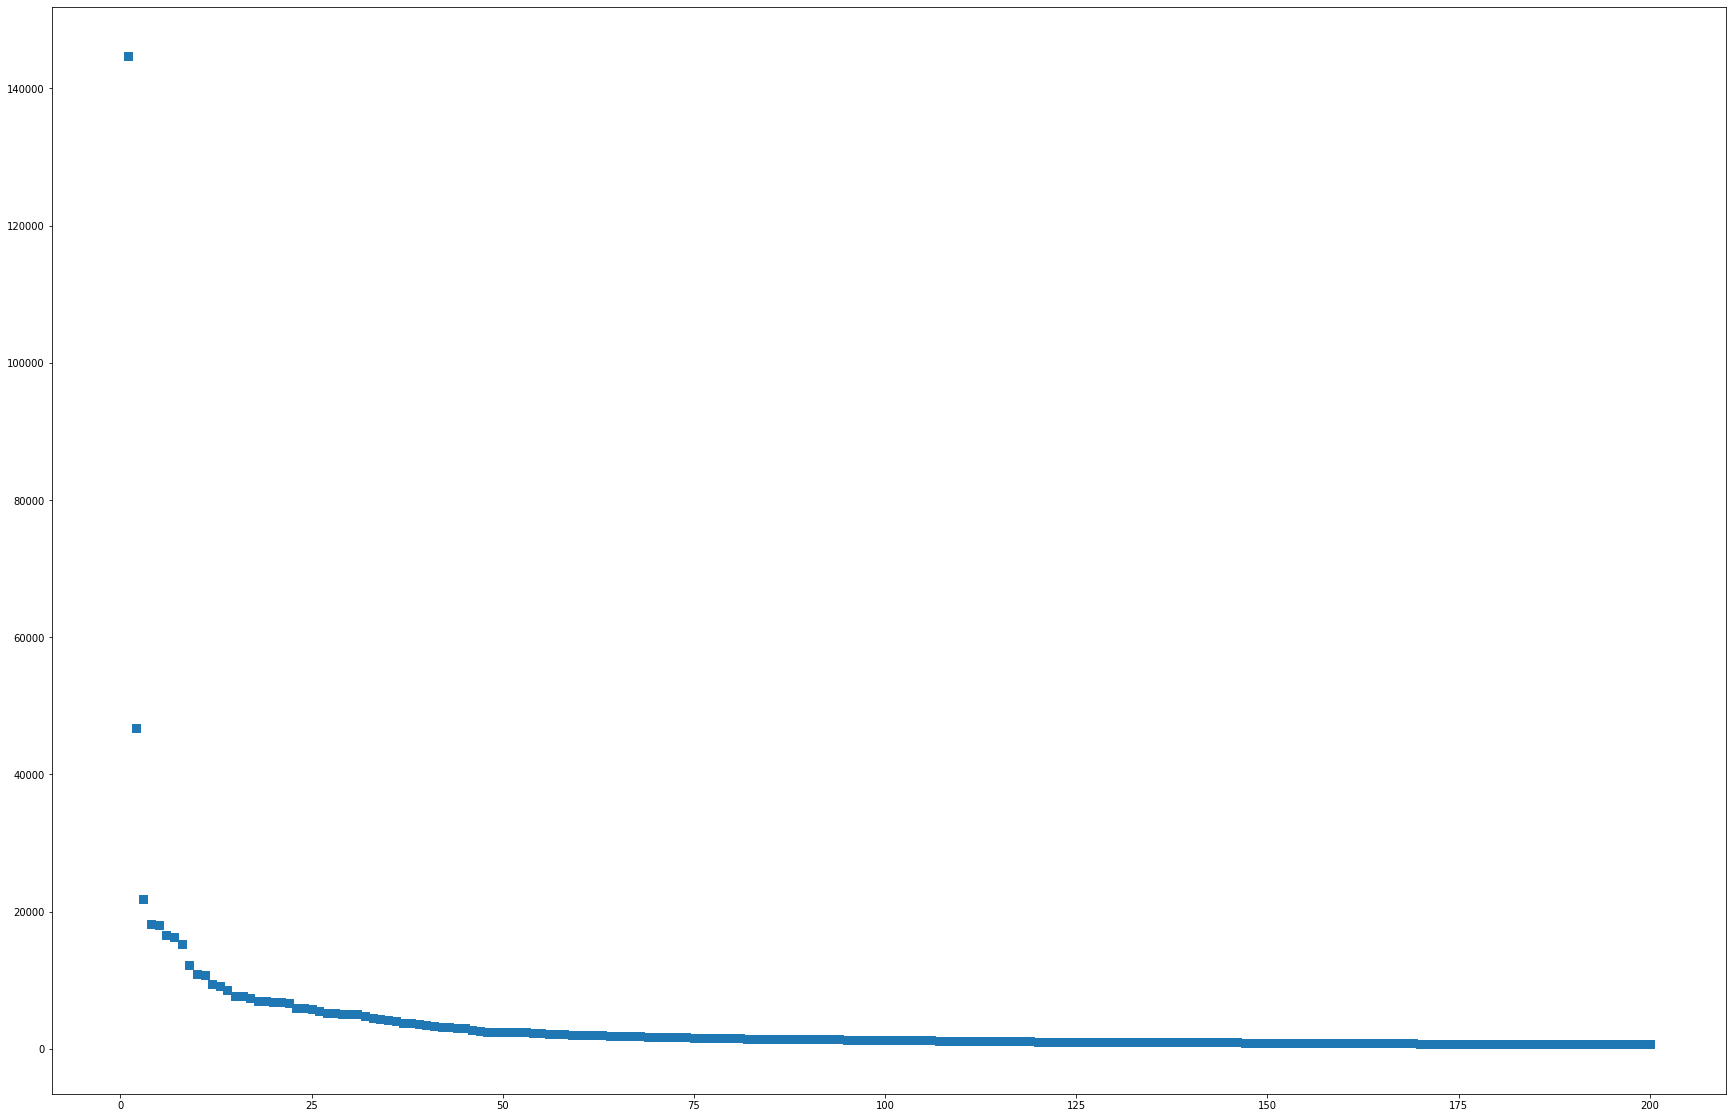

In [72]:
x_index = 1
x_coords = []
y_coords = []
for token, freq in features_terms.most_common()[0:200]:
    x_coords.append(x_index)
    y_coords.append(freq)
    x_index += 1

fig = plt.figure(figsize=(30,20))

plt.scatter(x_coords, y_coords, marker='s', s=50)

In [73]:
tf_1 = [word for word, count in features_terms.most_common() if count == 1]

## Add some tokens to tokenizer, not sure how to add in fine-tuned task

In [63]:
add_tokens = ['COVID', 'fucking', 'believe', 'tweet', 'virus']
num_add = tokenizer.add_tokens(add_tokens)
tokenizer.save_pretrained("preprocessed/new_tokenizer")

I0609 10:06:53.401688 140511225624384 tokenization_utils.py:1170] Adding hug to the vocabulary
I0609 10:06:53.402557 140511225624384 tokenization_utils.py:1170] Adding COVID to the vocabulary
I0609 10:06:53.402923 140511225624384 tokenization_utils.py:1170] Adding fucking to the vocabulary
I0609 10:06:53.403187 140511225624384 tokenization_utils.py:1170] Adding hear to the vocabulary
I0609 10:06:53.403523 140511225624384 tokenization_utils.py:1170] Adding believe to the vocabulary
I0609 10:06:53.403970 140511225624384 tokenization_utils.py:1170] Adding tweet to the vocabulary
I0609 10:06:53.404237 140511225624384 tokenization_utils.py:1170] Adding virus to the vocabulary
I0609 10:06:53.404569 140511225624384 tokenization_utils.py:1170] Adding decide to the vocabulary
I0609 10:06:53.404909 140511225624384 tokenization_utils.py:1170] Adding wish to the vocabulary
I0609 10:06:53.405162 140511225624384 tokenization_utils.py:1170] Adding thankful to the vocabulary


('preprocessed/new_tokenizer/vocab.json',
 'preprocessed/new_tokenizer/merges.txt',
 'preprocessed/new_tokenizer/special_tokens_map.json',
 'preprocessed/new_tokenizer/added_tokens.json')

## Store preprocessed results

In [129]:
df_train.head()

,idx,text,reply,categories,mp4,map_punc_text,map_punc_reply,map_demojize_text,map_demojize_reply,map_more_punc_text,map_more_punc_reply
0,0,we can all agree that any song by Niall Horan.,oui oui,[yes],6dc39e96b11275f064fdaed88273b45e.mp4,we can all agree that any song by Niall Horan .,oui oui,we can all agree that any song by Niall Horan .,oui oui,we can all agree that any song by Niall Horan .,oui oui
1,1,Will you be installing #ScottyFromMarketing's ...,,[no],cfff051f05d8d3b7136c7d58ea6ad55f.mp4,Will you be installing # ScottyFromMarketing ...,,Will you be installing # ScottyFromMarketing ...,,Will you be install # Scotty from marketing ...,
2,2,Growing up my mum would call me a Nigga despit...,And he joins in??? Pour some hot grits on em,[smh],bf39e7bd9ad24354ce3ba6822b0104af.mp4,Growing up my mum would call me a Nigga despit...,And he joins in ? ? ? Pour some hot grits o...,Growing up my mum would call me a Nigga despit...,And he joins in ? ? ? Pour some hot grits o...,Growing up my mum would call me a Nigga despit...,And he joins in ? ? ? Pour some hot grits o...
3,3,Rest your head on my chest when the world feel...,😂😂😂😂😂,[wink],173a707a04c277354a2f23cf01d6151e.mp4,Rest your head on my chest when the world feel...,😂😂😂😂😂,Rest your head on my chest when the world feel...,face with tears of joy,Rest your head on my chest when the world feel...,face with tear of joy
4,4,Imagine Will Hernandez and Wills both doing a ...,,[yes],aab6d6bfb0c1382269ddba9b71cc8b7a.mp4,Imagine Will Hernandez and Wills both doing a ...,,Imagine Will Hernandez and Wills both doing a ...,,Imagine Will Hernandez and Wills both doing a ...,


In [130]:
df_dev.head()

,idx,text,reply,map_punc_text,map_punc_reply,map_demojize_text,map_demojize_reply,map_more_punc_text,map_more_punc_reply
0,32000,"Drop your cash app, use hashtag #BailoutHumansNow",$tyratomaro #BailoutHumans,"Drop your cash app , use hashtag # BailoutHu...",$ tyratomaro # BailoutHumans,"Drop your cash app , use hashtag # BailoutHu...",$ tyratomaro # BailoutHumans,"Drop your cash app , use hashtag # BailoutHu...",$ tyratomaro # BailoutHumans
1,32001,After interviewing with a few incredible peopl...,CONGRATS!!!!!,After interviewing with a few incredible peopl...,CONGRATS ! ! ! ! !,After interviewing with a few incredible peopl...,CONGRATS ! ! ! ! !,After interviewing with a few incredible peopl...,CONGRATS ! ! ! ! !
2,32002,I know GTC festival not happening next month b...,,I know GTC festival not happening next month b...,,I know GTC festival not happening next month b...,,I know GTC festival not happening next month b...,
3,32003,"Lordy, my daughter just said, “I wonder how th...",,"Lordy , my daughter just said , "" I wonde...",,"Lordy , my daughter just said , "" I wonde...",,"Lordy , my daughter just said , "" I wonde...",
4,32004,THE UNEMPLOYMENT CLAIM SYSTEM SUCKS SO MUCH DICK,Watching everyone else get their weekly unempl...,THE UNEMPLOYMENT CLAIM SYSTEM SUCKS SO MUCH DICK,Watching everyone else get their weekly unempl...,THE UNEMPLOYMENT CLAIM SYSTEM SUCKS SO MUCH DICK,Watching everyone else get their weekly unempl...,THE UNEMPLOYMENT CLAIM SYSTEM SUCKS SO MUCH DICK,Watching everyone else get their weekly unempl...


In [131]:
df_test.head()

,idx,text,reply,map_punc_text,map_punc_reply,map_demojize_text,map_demojize_reply,map_more_punc_text,map_more_punc_reply
0,36000,@Youngdeji_ I think if uzi and carti dropping ...,,@ Youngdeji - I think if uzi and carti dro...,,@ Youngdeji - I think if uzi and carti dro...,,@ Youngdeji - I think if uzi and carti dro...,
1,36001,For the third year in a row we are discussing ...,,For the third year in a row we are discussing ...,,For the third year in a row we are discussing ...,,For the third year in a row we are discussing ...,
2,36002,dababy album sounds like it was made for nigga...,That's why you bought it.,dababy album sounds like it was made for nigga...,That ' s why you bought it .,dababy album sounds like it was made for nigga...,That ' s why you bought it .,dababy album sounds like it was made for nigga...,That ' s why you buy it .
3,36003,Majority of Indians do not watch any sport oth...,@ZairaWasimmm got a great story because of the...,Majority of Indians do not watch any sport oth...,@ ZairaWasimmm got a great story because of t...,Majority of Indians do not watch any sport oth...,@ ZairaWasimmm got a great story because of t...,Majority of Indians do not watch any sport oth...,@ ZairaWasimmm got a great story because of t...
4,36004,everybody is just now listening to @madisonbee...,,everybody is just now listening to @ madisonb...,,everybody is just now listening to @ madisonb...,,everybody is just now listen to @ madisonbeer...,


## Output preprocessed to json

In [132]:
df_preprocessed = df_train[['idx', 'map_more_punc_text', 'map_more_punc_reply', 'categories']].copy()
df_preprocessed.columns = ['idx', 'text', 'reply', 'categories']
df_preprocessed.to_json('./preprocessed/preprocess_train.json', orient='records', lines=True)

In [133]:
df_preprocessed_dev = df_dev[['idx', 'map_more_punc_text', 'map_more_punc_reply']].copy()
df_preprocessed_dev.columns = ['idx', 'text', 'reply']
df_preprocessed_dev.to_json('./preprocessed/preprocess_dev.json', orient='records', lines=True)

In [134]:
df_preprocessed_test = df_test[['idx', 'map_more_punc_text', 'map_more_punc_reply']].copy()
df_preprocessed_test.columns = ['idx', 'text', 'reply']
df_preprocessed_test.to_json('./preprocessed/preprocess_test.json', orient='records', lines=True)

### Don't have time to test, so won't use in testing phase

In [ ]:
df_preprocessed = df_train[['idx', 'map_demojize_text', 'map_demojize_reply', 'categories']].copy()
df_preprocessed.columns = ['idx', 'text', 'reply', 'categories']
df_preprocessed.to_json('./preprocessed/preprocess_train.json', orient='records', lines=True)

In [ ]:
df_preprocessed_dev = df_dev[['idx', 'map_demojize_text', 'map_demojize_reply']].copy()
df_preprocessed_dev.columns = ['idx', 'text', 'reply']
df_preprocessed_dev.to_json('./preprocessed/preprocess_dev.json', orient='records', lines=True)

In [ ]:
df_preprocessed_test = df_test[['idx', 'map_demojize_text', 'map_demojize_reply']].copy()
df_preprocessed_test.columns = ['idx', 'text', 'reply']
df_preprocessed_test.to_json('./preprocessed/preprocess_test.json', orient='records', lines=True)